## Get the Data

Run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [6]:
import pandas as pd

## Data Exploration

Read the .csv file and store it in a Pandas dataframe. Setting the header row to 0 allows us to substitute our own column names.

In [36]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

Examine the first 5 rows and the last 5 rows of the of the dataframe

In [35]:
df.head(5)
df.tail(5)

,DATE,TAG,POSTS
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0
1991,2020-07-01 00:00:00,swift,3607.0


Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [6]:
df.shape

(1991, 3)

Count the number of entries in each column of the dataframe

In [13]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [30]:
post_per_lang = df.groupby('TAG').sum()
post_per_lang.sort_values('POSTS', ascending=False).index[0]

'javascript'

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

How many months of data exist per language? Count the entries in each column, we can see how many months of entries exist per programming language.
Which language had the fewest months with an entry?


In [36]:
no_of_months_lang = df.groupby('TAG').count()
no_of_months_lang.sort_values('POSTS').index[0]

'go'

## Data Cleaning

Fix the date format to make it more readable i.e. from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [7]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## PIVOT TABLE

Make a pivot Table

In [8]:
pivoted_df = df.pivot(index='DATE', columns='TAG', values='POSTS')


## Data Manipulation



What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [5]:
pivoted_df.shape

In [5]:
pivoted_df.columns

In [5]:
pivoted_df.head(5)

Substitute number '0' for each NaN Value in the dataframe. Also check if there are any NaN values left in the entire DataFrame

In [9]:
pivoted_df.fillna(0, inplace=True)

In [10]:
pivoted_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [1]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


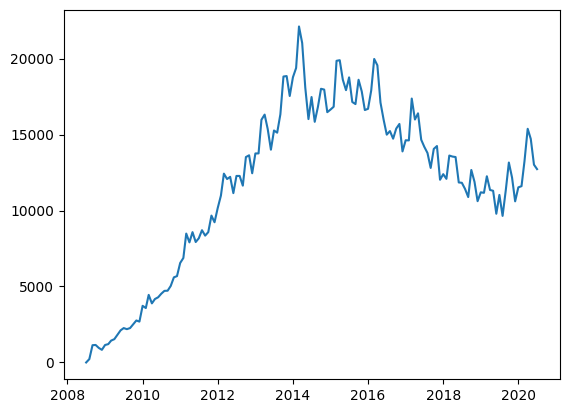

In [11]:
plt.plot(pivoted_df.index, pivoted_df.java)

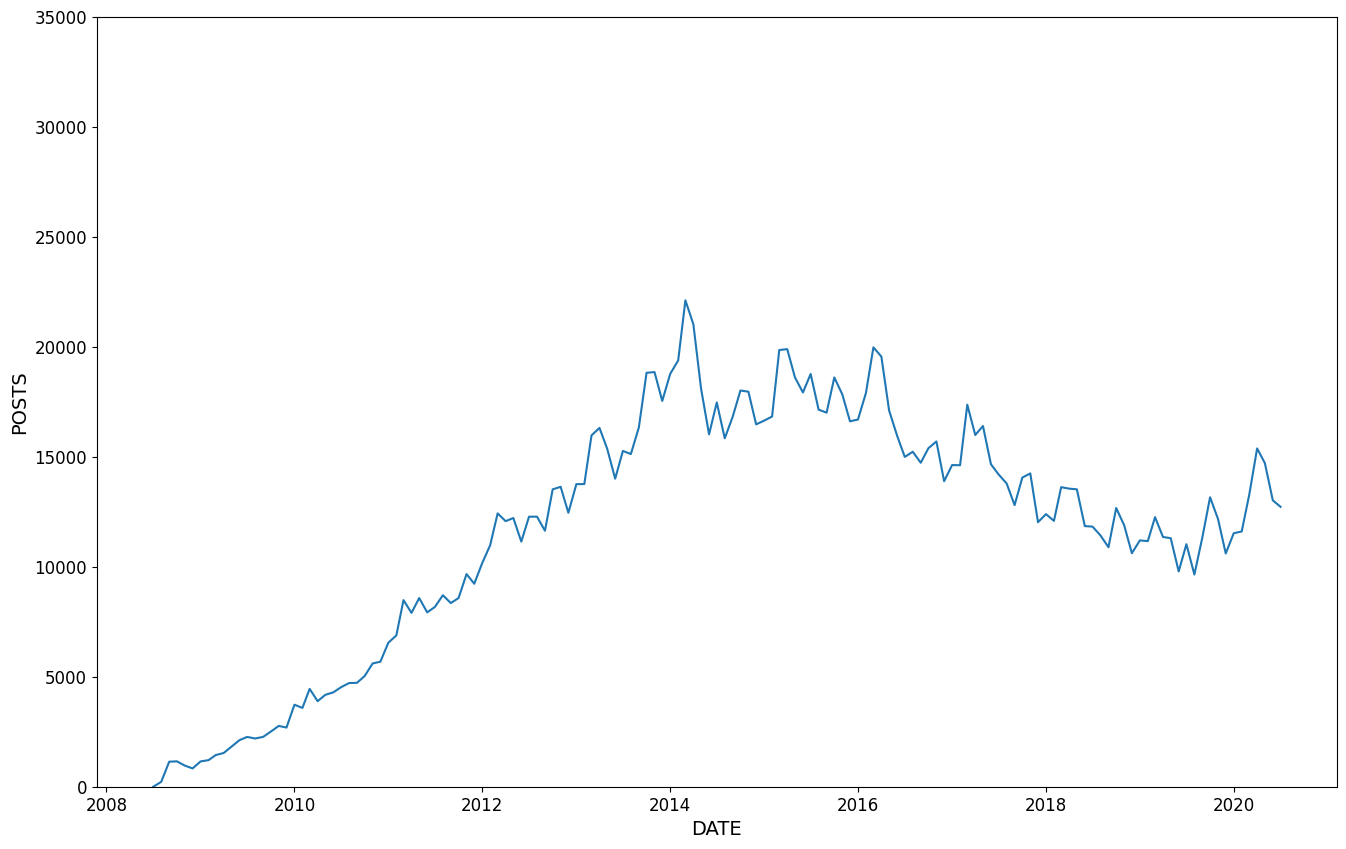

In [12]:
plt.figure(figsize=[16, 10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('POSTS', fontsize=14)
plt.ylim(0,35000)
plt.plot(pivoted_df.index, pivoted_df.java)

Show two line (e.g. for Java and Python) on the same chart.

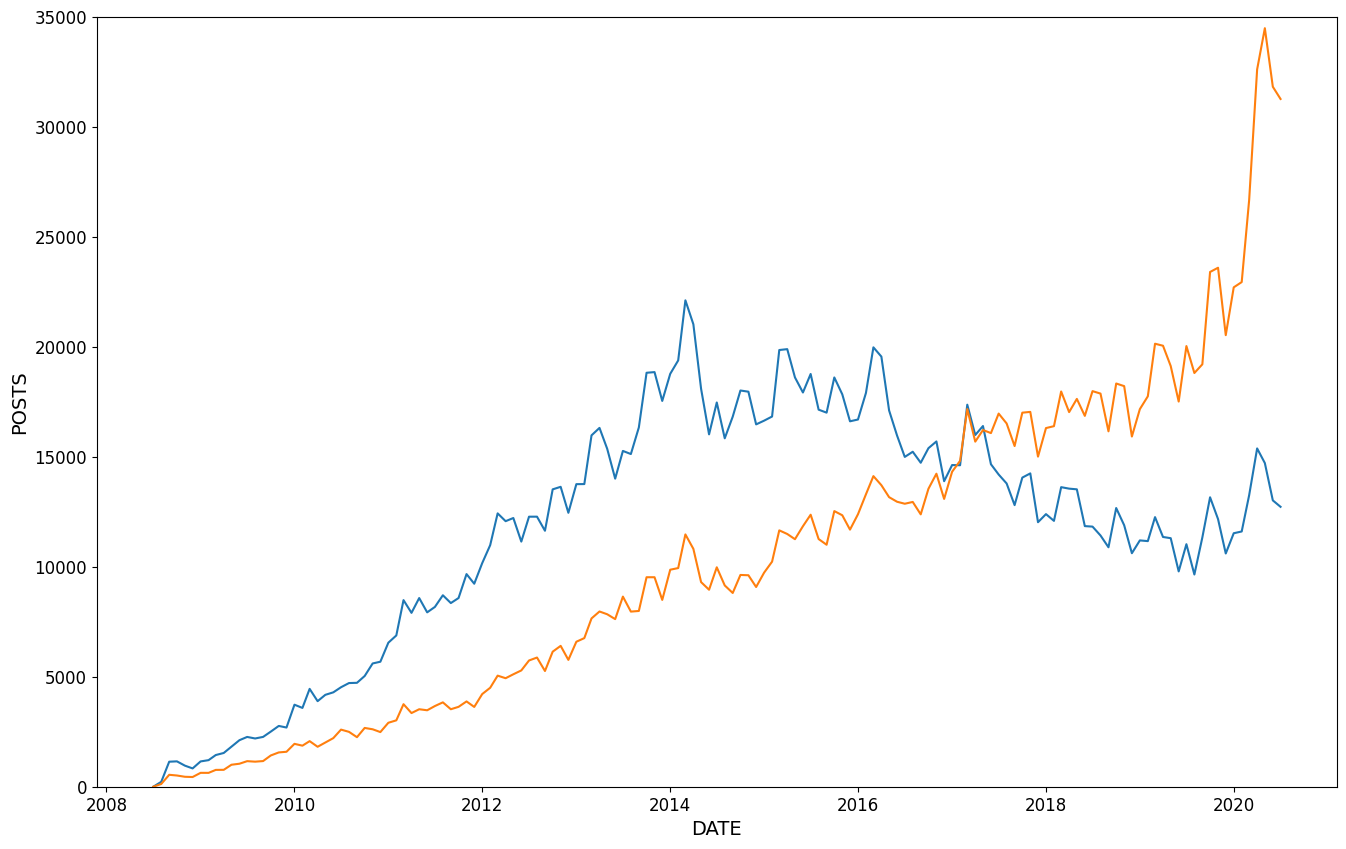

In [17]:
plt.figure(figsize=[16, 10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('POSTS', fontsize=14)
plt.ylim(0,35000)
plt.plot(pivoted_df.index, pivoted_df.java)
plt.plot(pivoted_df.index, pivoted_df.python)

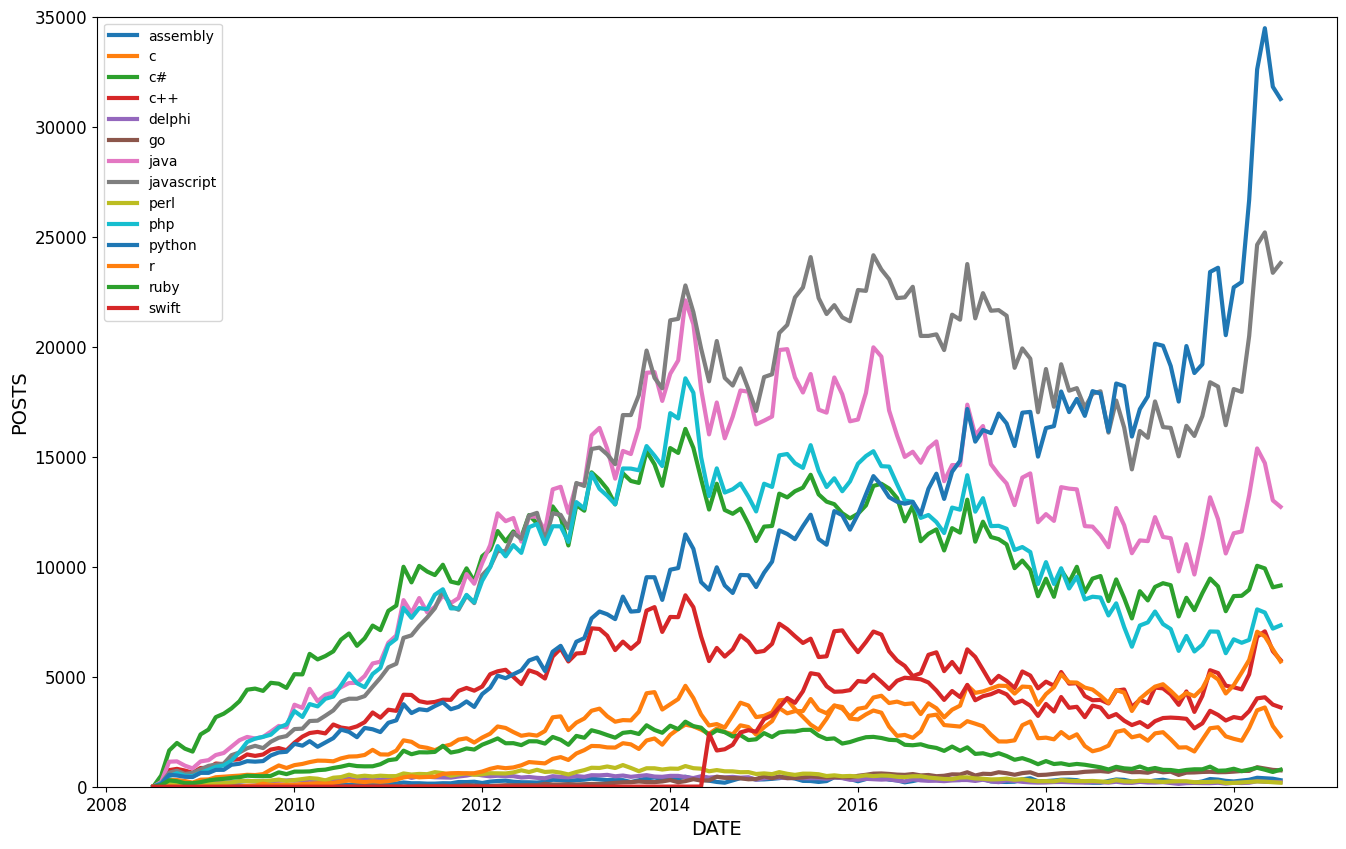

In [23]:
plt.figure(figsize=[16, 10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('POSTS', fontsize=14)
plt.ylim(0,35000)
for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=pivoted_df[column].name)
plt.legend()

Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [27]:
roll_df = pivoted_df.rolling(window=6).mean()


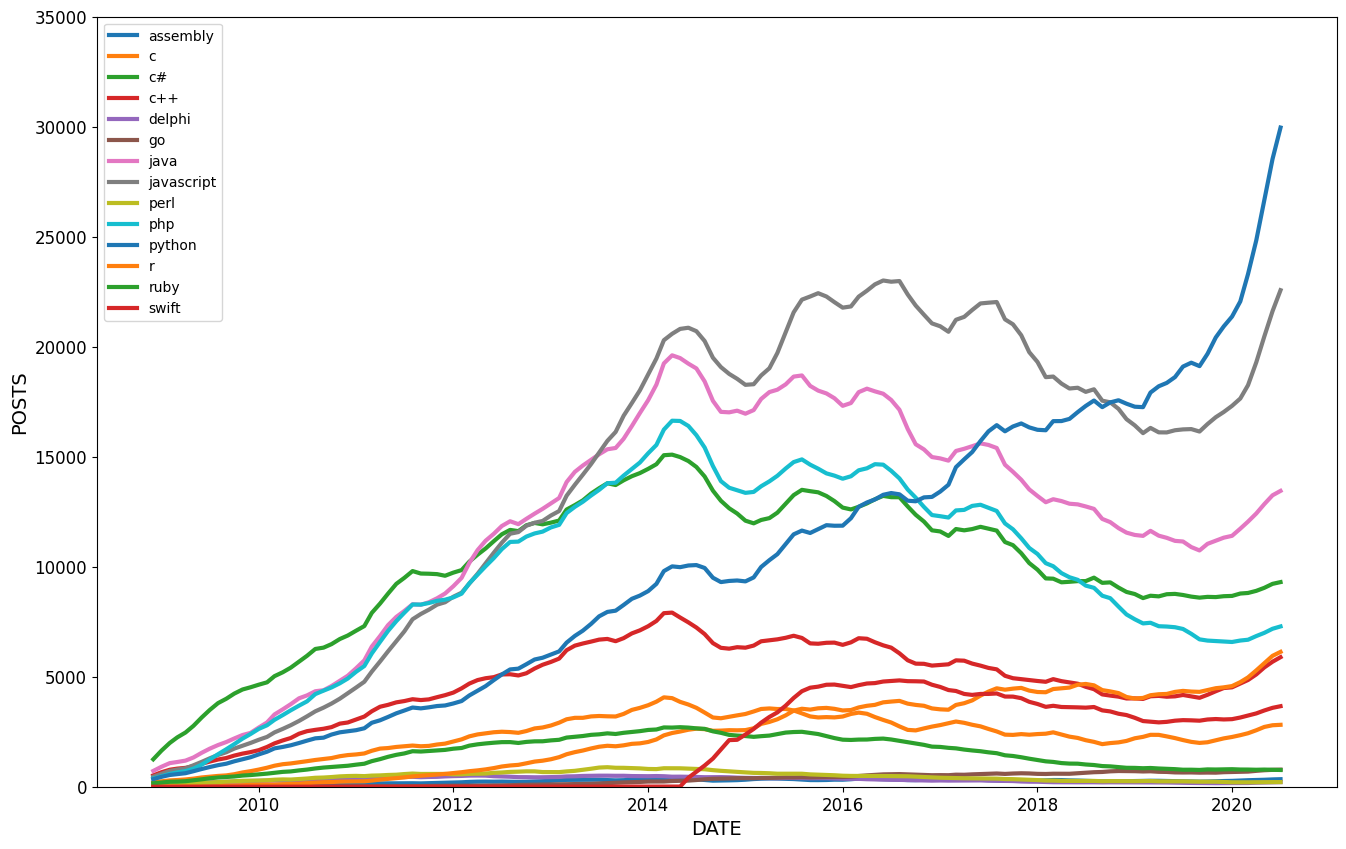

In [28]:
plt.figure(figsize=[16, 10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('DATE', fontsize=14)
plt.ylabel('POSTS', fontsize=14)
plt.ylim(0,35000)
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend()